In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
def polybase(x,grado):
    b = np.zeros((len(x),grado+1))
    for i in range(grado+1):
        b[:,i] = np.power(x,i)
    return b

# Cuadrados mínimos lineales

Primero un ejemplo sintético en 1 dimensión donde se generan datos aleatorio y se hace el ajuste despejando de la ecuación normal.

$ y \sim \beta X + ϵ$

$X$ es la variable independiente, $y$ la dependiente y $\beta$ son los coeficientes de la regresión a buscar.

$X$ tiene la última columna con todos 1s para poder ajustar el término independiente

[[-0.55820506  1.08452906]]


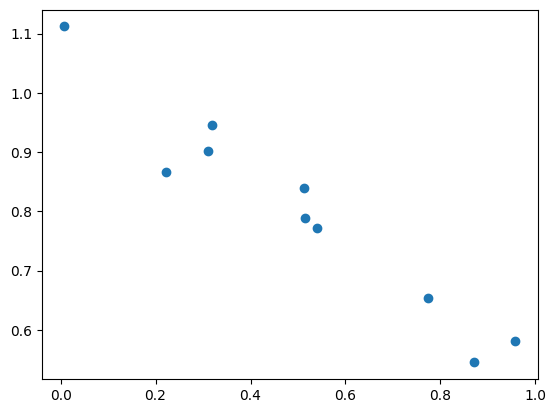

In [11]:
np.random.seed(14)
N = 10
M = 1

# datos independientes
X = np.random.rand(N,M)

# pendiente y ordenada al origen aleatorios
beta = np.random.randn(1,M+1)

# se agrega una columna de unos
X = np.c_[X, np.ones(N)]

# creamos los datos dependientes
y = (beta@X.T).T + np.random.randn(N,1)*0.05

plt.plot(X[:,0], y,'o')
print(beta)

Encontramos los coeficientes con

$$\beta=(X^tX)^{-1}X^ty$$

In [13]:
beta_pred = np.linalg.inv(X.T@X)@X.T@y
print(beta_pred)

[[-0.55855812]
 [ 1.0811791 ]]


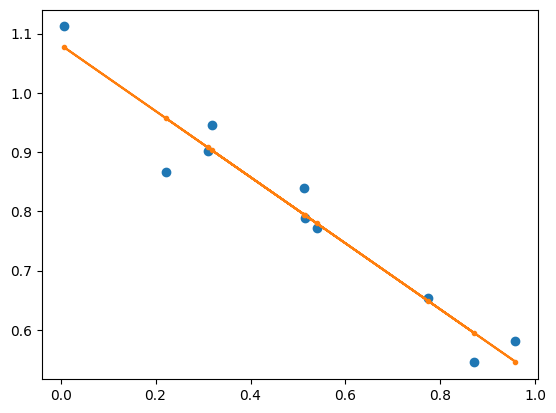

In [14]:
y_pred = (beta_pred.T@X.T).T
plt.plot(X[:,0], y,'o')
plt.plot(X[:,0], y_pred,'.-');

Computamos el error:

In [15]:
ECM = np.sum((y_pred-y)**2)
ECM

0.017175843069788893

## Sobreajuste

Repetimos el procedimiento pero vamos a generar datos de validación y ver el error ahí

Encontramos la solución con 3 métodos. Vamos a usar el de SVD porque es el más fácil teoricamente. Colab manda mucha fruta con los tiempos.

[[-0.56786791 -1.39244738]]


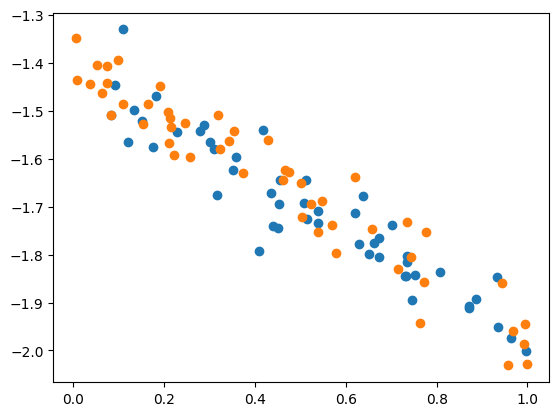

In [16]:
np.random.seed(14)
N = 100
M = 1

# datos independientes
X = np.random.rand(N,M)

# pendiente y ordenada al origen aleatorios
beta = np.random.randn(1,M+1)

# se agrega una columna de unos
X = np.c_[X, np.ones(N)]

# separamos los datos en ajuste y validación intercalados
X_ajuste = X[::2]
X_val = X[1::2]

# creamos los datos dependientes
y = (beta@X.T).T + np.random.randn(N,1)*0.05

y_ajuste = y[::2]
y_val = y[1::2]

plt.plot(X_ajuste[:,0], y_ajuste,'o')
plt.plot(X_val[:,0], y_val,'o')

print(beta)

In [17]:
beta_pred = np.linalg.inv(X_ajuste.T@X_ajuste)@X_ajuste.T@y_ajuste
print(beta_pred)

[[-0.54600806]
 [-1.42171547]]


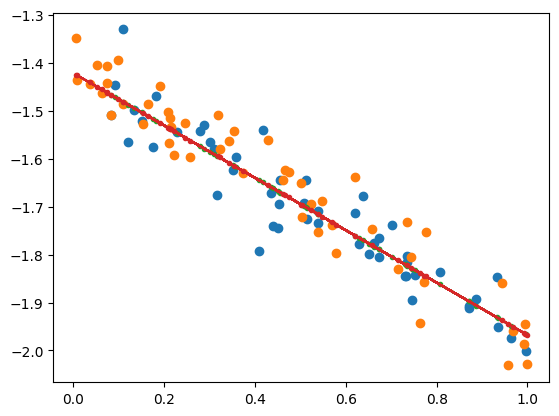

In [18]:
y_ajuste_pred = (beta_pred.T@X_ajuste.T).T
y_val_pred = (beta_pred.T@X_val.T).T
plt.plot(X_ajuste[:,0], y_ajuste,'o')
plt.plot(X_val[:,0], y_val,'o')
plt.plot(X_ajuste[:,0], y_ajuste_pred,'.-');
plt.plot(X_val[:,0], y_val_pred,'.-');

In [21]:
ECM_ajuste = np.sum((y_ajuste_pred-y_ajuste)**2)
ECM_val = np.sum((y_val_pred-y_val)**2)
ECM_ajuste, ECM_val

(0.13327056641425908, 0.13619874341925348)

# **EJERCICIO 1**

Calcular el error relativo de sobreajuste $\displaystyle \frac{ECM_{val}-ECM_{ajuste}}{ECM_{ajuste}}$ en función de la dimensionalidad $M$ del problema. Recordar N>M

## Polinomios

Base de monomios $\{1,x,x^2, \cdots, x^n\}$

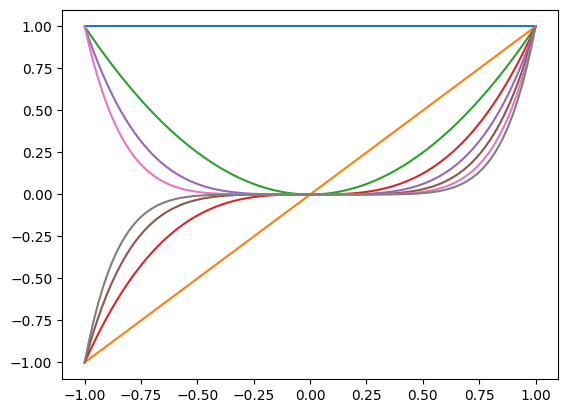

In [22]:
N = 100
grado = 7
x = np.linspace(-1,1,N)
X = polybase(x, grado)
plt.plot(x, X);

Base de polinomios de Legendre $\{P_0(x),P_1(x),\cdots,P_n(x)\}$

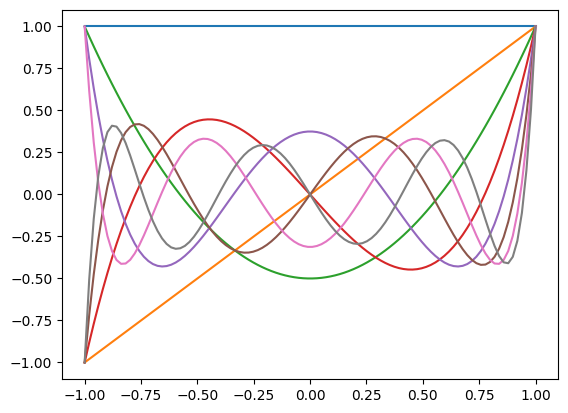

In [23]:
N = 100
grado = 7
x = np.linspace(-1,1,N)
X = np.polynomial.legendre.legvander(x, grado)
plt.plot(x, X);

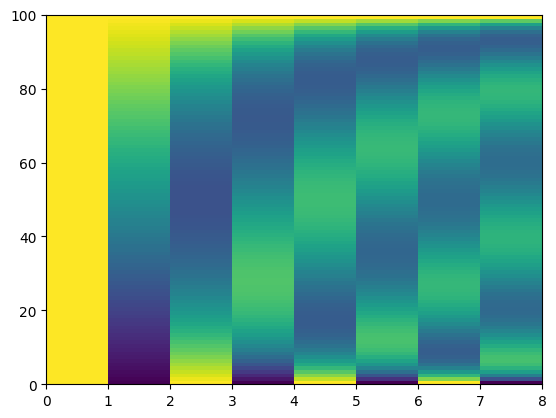

In [24]:
X = np.polynomial.legendre.legvander(x, grado)
plt.pcolor(X);

Comparemos el número de condición de los monomios y el de los polinomios de Legendre

In [34]:
grado = 5
x = np.linspace(-1,1,100)
X = polybase(x, grado)
print(np.linalg.cond(X))
X = np.polynomial.legendre.legvander(x, grado)
print(np.linalg.cond(X))

41.919365347592574
3.18576489183929


Ajustemos con estos polinomios una función arbitraria con oscilaciones



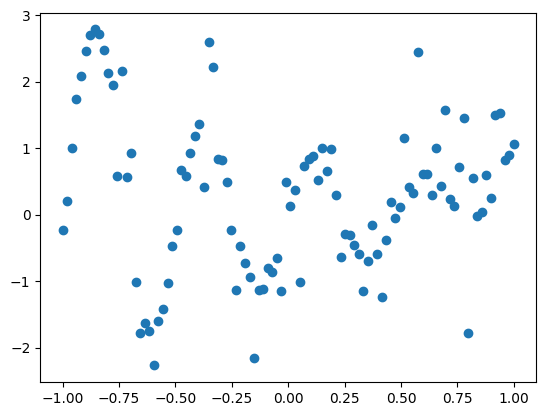

In [35]:
np.random.seed(34)
x = np.linspace(-1,1,100)
y = np.sin(x*2.0)*x**5+np.sin(x*13.0)*np.exp(-1.0*x) + (np.random.rand(len(x))>0.5)*np.random.randn(len(x))*0.8
plt.plot(x,y,'o');

0.28541431543102935


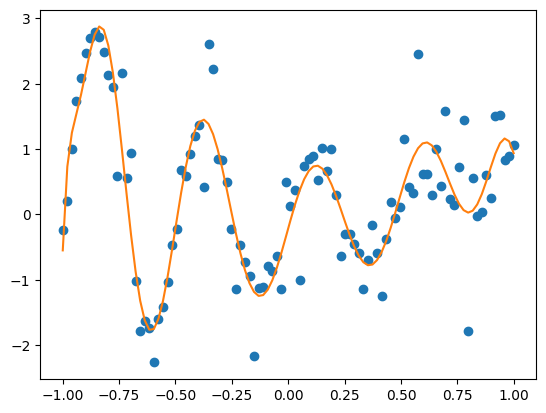

In [60]:
def predict_with_grado(ys, xs, grado):
  X = np.polynomial.legendre.legvander(xs, grado)
  beta_pred = np.linalg.inv(X.T@X)@X.T@ys

  y_pred = (beta_pred.T@X.T).T

  return (beta_pred, y_pred)

def ECM(pred):
  return np.mean((pred-y)**2)


grado = 14
_, y_pred = predict_with_grado(y, x, grado)
plt.plot(x,y,'o');
plt.plot(x,y_pred,'-');
print(ECM(y_pred))

# **EJERCICIO 2**

Explorar el grado y encontrar el valor que minimiza el ECM. Repetir separando los datos en ajuste y validación y encontrar el que minimiza el error de validación. Hacer un gráfico del $ECM_{val}$ en función del grado.



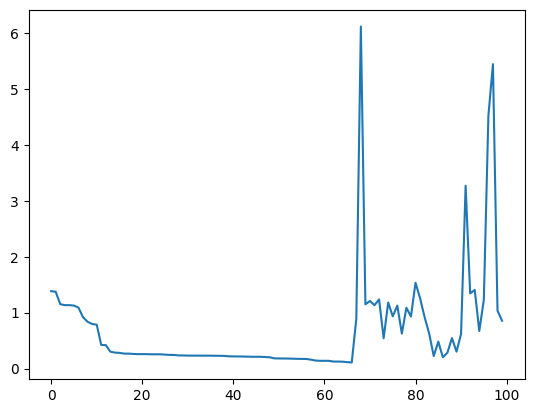

In [88]:
# plt.plot(x,y,'o');

grados = range(100)
ecms = np.zeros(len(grados))

for i in range(len(grados)):
  grado = grados[i]
  _, y_pred = predict_with_grado(y, x, grado)

  ecms[i] = ECM(y_pred)

plt.plot(grados, ecms)

grado_min_ecm = np.argmin(ecms)

0.10859223396236314


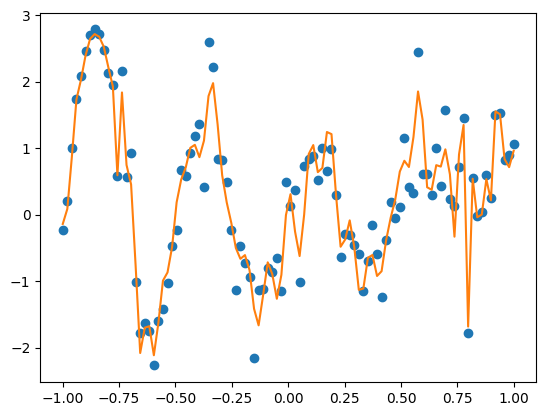

In [89]:
_, y_pred = predict_with_grado(y, x, grado_min_ecm)
plt.plot(x,y,'o');
plt.plot(x,y_pred,'-');
print(ECM(y_pred))

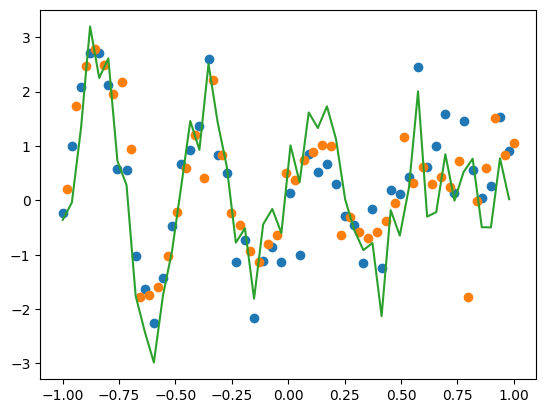

In [95]:
X_ajuste = x[::2]
X_val = x[1::2]

y_ajuste = y[::2]
y_val = y[1::2]

def graph_pred(grado):
  plt.plot(X_ajuste, y_ajuste,'o')
  plt.plot(X_val, y_val,'o')

  _, y_pred = predict_with_grado(y_ajuste, X_ajuste, grado)

  plt.plot(X_ajuste,y_pred,'-');

def ecm_relativo(pred):
  ecm_val = np.mean((pred-y_val)**2)
  ecm_ajuste = np.mean((pred-y_ajuste)**2)
  print((ecm_val, ecm_ajuste))
  return abs((ecm_val - ecm_ajuste)/ecm_ajuste)

graph_pred(grado_min_ecm)

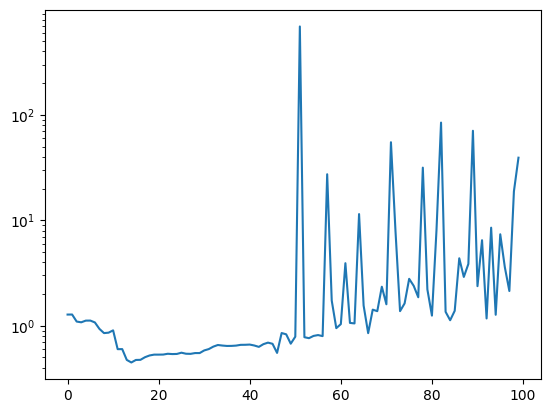

14


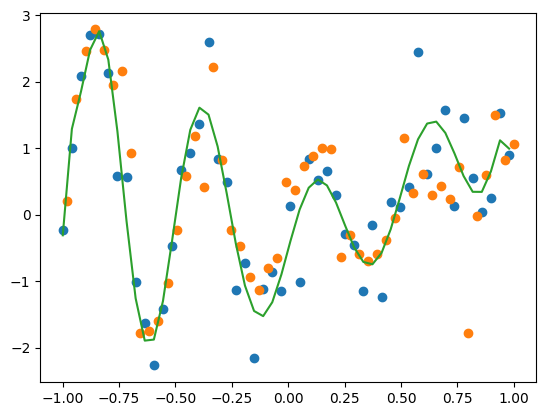

In [100]:
# Busco minimizar el error ECM_{val}
for i in range(len(grados)):
  grado = grados[i]
  _, y_pred = predict_with_grado(y_ajuste, X_ajuste, grado)

  ecms[i] = np.mean((y_pred-y_val)**2)

plt.plot(grados, ecms)
plt.yscale('log')
plt.show()

print(np.argmin(ecms))
graph_pred(np.argmin(ecms))